In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

SalePrice       0
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64
           SalePrice    GrLivArea  BedroomAbvGr     FullBath     HalfBath
count    1460.000000  1460.000000   1460.000000  1460.000000  1460.000000
mean   180921.195890  1515.463699      2.866438     1.565068     0.382877
std     79442.502883   525.480383      0.815778     0.550916     0.502885
min     34900.000000   334.000000      0.000000     0.000000     0.000000
25%    129975.000000  1129.500000      2.000000     1.000000     0.000000
50%    163000.000000  1464.000000      3.000000     2.000000     0.000000
75%    214000.000000  1776.750000      3.000000     2.000000     1.000000
max    755000.000000  5642.000000      8.000000     3.000000     2.000000
              SalePrice  GrLivArea  BedroomAbvGr  FullBath  HalfBath
SalePrice      1.000000   0.708624      0.168213  0.560664  0.284108
GrLivArea      0.708624   1.000000      0.521270  0.630012  0.415772
BedroomAbvGr   0.168213 

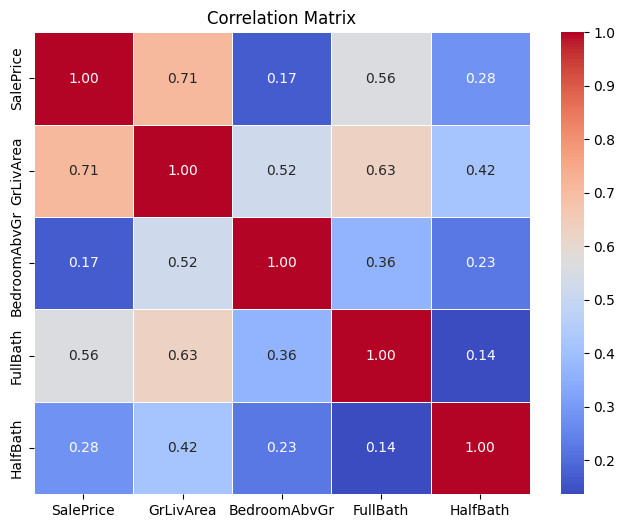

In [12]:
# Load the training and testing datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Select relevant features
features = ['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
train_data = train_data[features]

# Check for missing values
print(train_data.isnull().sum())

# Summary statistics
print(train_data.describe())

# Correlation matrix
corr_matrix = train_data.corr()
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Define features and target variable for training data
X_train = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y_train = train_data['SalePrice']

# Fit the linear regression model using training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using training data
train_predictions = model.predict(X_train)



In [14]:
# Define features for testing data
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Make predictions using testing data
test_predictions = model.predict(X_test)


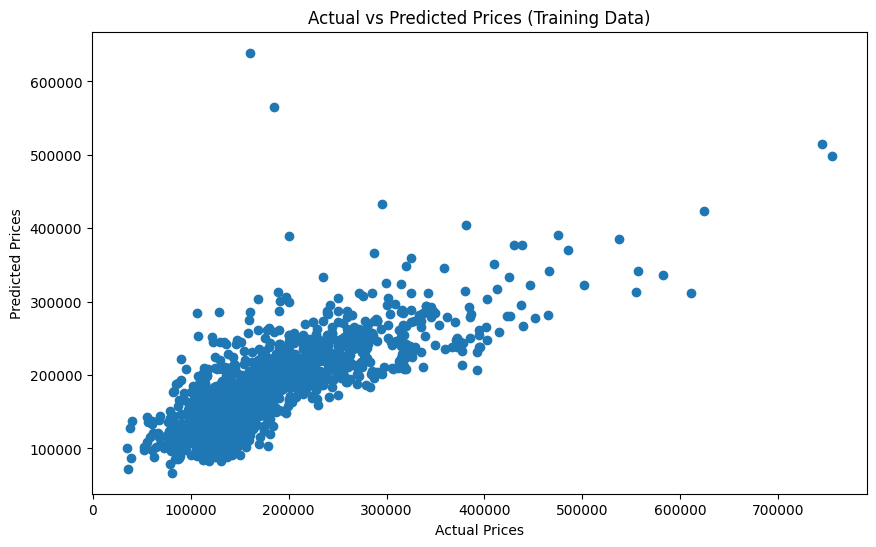

In [15]:
# Plot actual prices against predictions for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Training Data)')
plt.show()

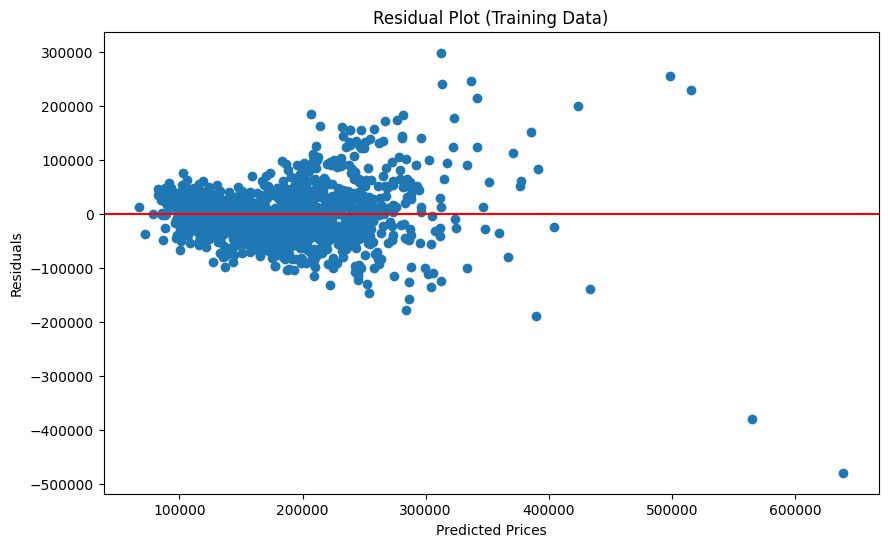

Training Mean Squared Error: 2625932483.691595
Training R^2 Score: 0.5836339766023473


In [16]:
# Calculate residuals for training data
train_residuals = y_train - train_predictions

# Plot residuals for training data
plt.figure(figsize=(10, 6))
plt.scatter(train_predictions, train_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Data)')
plt.show()

# Calculate and print the accuracy metrics for training data
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
print("Training Mean Squared Error:", train_mse)
print("Training R^2 Score:", train_r2)

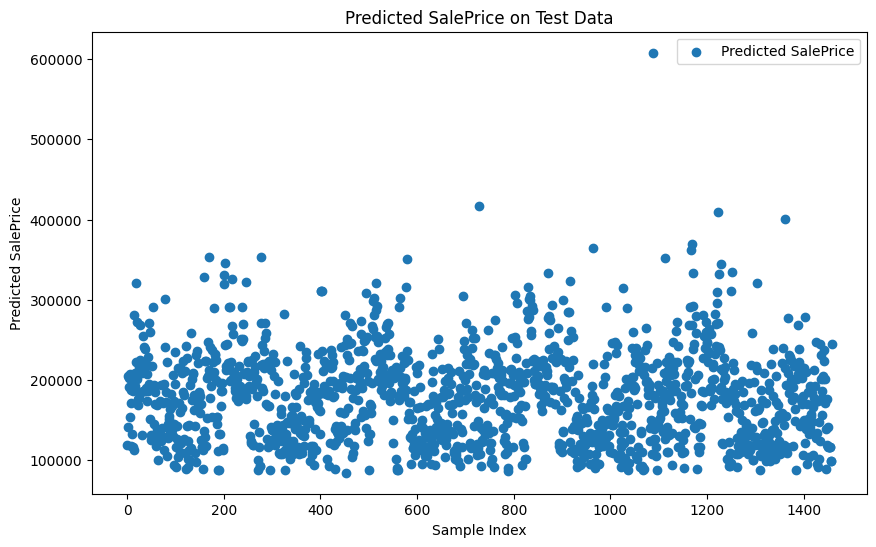

In [17]:
# Use the trained model to predict SalePrice using the test data
test_predictions = model.predict(X_test)

# Plot the predicted SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_predictions)), test_predictions, label='Predicted SalePrice')
plt.xlabel('Sample Index')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted SalePrice on Test Data')
plt.legend()
plt.show()


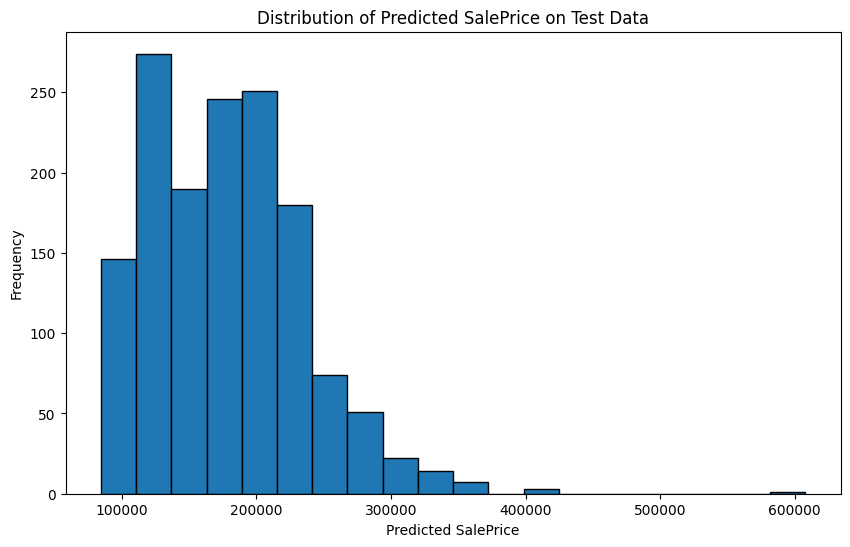

In [18]:
# Plot the predicted SalePrice using a histogram
plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=20, edgecolor='black')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted SalePrice on Test Data')
plt.show()
